In [1]:
!pip install mysql-connector-python

In [1]:
import getpass
import pymysql
import mysql.connector as connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    Password=getpass.getpass("Password: ")
    mydb = connection.connect(host="localhost", database = 'warehouse',user="root", passwd=Password,use_pure=True)
    
    query_Clothing = "Select * from Clothing;"
    Clothing_df = pd.read_sql(query_Clothing,mydb)
    query_Customer = "Select * from Customer;"
    Customer_df = pd.read_sql(query_Customer,mydb)
    query_Distribution_center = "Select * from Distribution_center;"
    Distribution_center_df = pd.read_sql(query_Distribution_center,mydb)
    query_Electronics = "Select * from Electronics;"
    Electronics_df = pd.read_sql(query_Electronics,mydb)
    query_Employee = "Select * from Employee;"
    Employee_df = pd.read_sql(query_Employee,mydb)
    query_Employee_Email = "Select * from Employee_Email;"
    Employee_Email_df = pd.read_sql(query_Employee_Email,mydb)
    query_Food = "Select * from Food;"
    Food_df = pd.read_sql(query_Food,mydb)
    query_Goods = "Select * from Goods;"
    Goods_df = pd.read_sql(query_Goods,mydb)
    query_Online_order = "Select * from Online_order;"
    Online_order_df = pd.read_sql(query_Online_order,mydb)
    query_Payment = "Select * from Payment;"
    Payment_df = pd.read_sql(query_Payment,mydb)
    query_Receives = "Select * from Receives;"
    Receives_df = pd.read_sql(query_Receives,mydb)
    query_Sells = "Select * from Sells;"
    Sells_df = pd.read_sql(query_Sells,mydb)
    query_Store = "Select * from Store;"
    Store_df = pd.read_sql(query_Store,mydb)
    query_Supplies_To = "Select * from Supplies_To;"
    Supplies_To_df = pd.read_sql(query_Supplies_To,mydb)
    query_Warehouse = "Select * from Warehouse;"
    Warehouse_df = pd.read_sql(query_Warehouse,mydb)
    query_Works_At = "Select * from Works_At;"
    Works_At_df = pd.read_sql(query_Works_At,mydb)
    mydb.close() 
    
except Exception as e:
    mydb.close()
    print(str(e))

Password: ········


In [3]:
# tables = pd.read_csv('tables_in_sql.csv')['Tables_in_warehouse'].tolist()

In [4]:
# for i in tables:
#     print("query_"+str(i)+" = \"Select * from "+str(i)+";\"")
#     print(str(i)+"_df = pd.read_sql(query_"+str(i)+",mydb)")

In [5]:
temp_df1 = Goods_df.merge(Food_df, left_on = 'product_code', right_on = 'food_product_code', how= 'inner') \
                   .groupby('category', as_index = False).agg({'stock':'sum'})

temp_df1

,category,stock
0,non-vegetarian,5222
1,vegan,4853
2,vegetarian,5414


<BarContainer object of 3 artists>

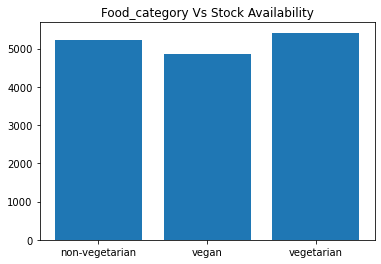

In [6]:
plt.title('Food_category Vs Stock Availability')
plt.bar(temp_df1['category'], temp_df1['stock'])

In [7]:
temp_df2 = Online_order_df.merge(Customer_df, on = 'customer_ID', how= 'inner')

In [8]:
state_qty = temp_df2.groupby('customer_state', as_index = False)['order_qty'].sum() \
                    .sort_values('order_qty', ascending = False)

In [9]:
total = np.sum(state_qty['order_qty'])
state_qty['Percentage_Orders'] = np.round((state_qty['order_qty']/total)*100,2)
state_qty.head()

,customer_state,order_qty,Percentage_Orders
13,Indiana,1873,3.74
29,New Jersey,1859,3.71
17,Louisiana,1709,3.41
47,West Virginia,1657,3.31
16,Kentucky[E],1654,3.30


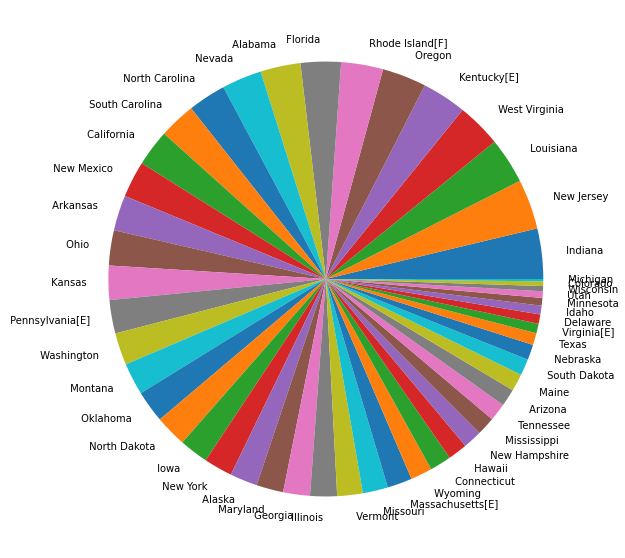

In [12]:
plt.figure(figsize=(10, 10))
y = np.array(state_qty['Percentage_Orders'])
mylabels = state_qty['customer_state'].unique()

plt.pie(y, labels = mylabels)
plt.show() 

In [158]:
cust_qty = temp_df2.groupby(['customer_ID','customer_name'], as_index = False)['order_qty'].sum() \
        .sort_values('order_qty', ascending = False).head(10)

In [159]:
cust_qty

,customer_ID,customer_name,order_qty
81,8205644701,Gil,991
62,6220521890,Craig,973
30,3350189523,Felix,967
29,3274885017,Maryam,960
23,2939727084,Harding,954
13,2169642349,April,951
83,8403068626,Theodore,951
55,5446066365,Aquila,951
97,9866586711,Noelle,941
35,3850938018,Haviva,938


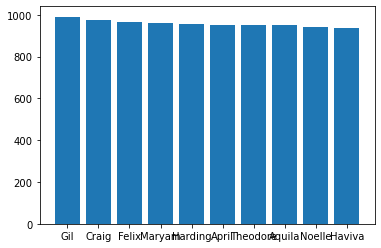

In [160]:
y = np.array(cust_qty['order_qty'])

plt.bar(cust_qty['customer_name'], y)
plt.show()